### Что делать
Построить 5 графиков по выбранным данным. 
Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 
Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.
 
Откуда брать данные

Можно взять свой датасет или воспользоваться одним из приведенных ниже:

Данные IMDB; https://www.kaggle.com/tmdb/tmdb-movie-metadata

Данные NYC;https://www.kaggle.com/c/nyc-taxi-trip-duration

Данные NBA. https://www.kaggle.com/drgilermo/nba-players-stats


In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,10

In [5]:
khl = pd.read_csv('khl.csv')
khl_players = pd.read_csv('khl_players.csv')

In [6]:
khl.head()

,DATE,DAY,MONTH,YEAR,SEASON,HOMETEAM,AWAYTEAM,WINNER,HG,AG,...,HGOT,AGOT,HGSO,AGSO,TOTALOT,TOTALMAIN,TOTALFULL,TOTALHMAIN,TOTALAWAYMAIN,GAP3PERIODS
0,12/9/2019,9,12,2019,1920,Avangard Omsk,Barys Nur-Sultan,Barys Nur-Sultan,2,3,...,NaN,NaN,NaN,NaN,NaN,5,5,2,3,1
1,12/9/2019,9,12,2019,1920,Dyn. Moscow,SKA St. Petersburg,SKA St. Petersburg,2,3,...,0.0,1.0,NaN,NaN,1.0,4,5,2,2,0
2,12/9/2019,9,12,2019,1920,Jokerit,Sp. Moscow,Jokerit,3,2,...,NaN,NaN,NaN,NaN,NaN,5,5,3,2,1
3,12/9/2019,9,12,2019,1920,Podolsk,Nizhny Novgorod,Podolsk,3,2,...,NaN,NaN,NaN,NaN,NaN,5,5,3,2,1
4,12/9/2019,9,12,2019,1920,Metallurg Magnitogorsk,Dinamo Riga,Metallurg Magnitogorsk,5,1,...,NaN,NaN,NaN,NaN,NaN,6,6,5,1,4


In [7]:
print(khl.columns.to_list())

['DATE', 'DAY', 'MONTH', 'YEAR', 'SEASON', 'HOMETEAM', 'AWAYTEAM', 'WINNER', 'HG', 'AG', 'ADD', 'HG1', 'AG1', 'TOTAL1', 'HG2', 'AG2', 'TOTAL2', 'HG3', 'AG3', 'TOTAL3', 'HGOT', 'AGOT', 'HGSO', 'AGSO', 'TOTALOT', 'TOTALMAIN', 'TOTALFULL', 'TOTALHMAIN', 'TOTALAWAYMAIN', 'GAP3PERIODS']


## 1 График

In [8]:
khl_1 = khl.groupby('SEASON').sum().reset_index()

In [9]:
khl_1_sort = khl_1[['SEASON', 'TOTALFULL']]
khl_1_sort.head()

,SEASON,TOTALFULL
0,809,3803
1,910,3872
2,1011,3756
3,1112,3526
4,1213,4022


In [10]:
khl_1_sort = khl_1_sort.astype({'SEASON':'str'})
khl_1_sort.head()

,SEASON,TOTALFULL
0,809,3803
1,910,3872
2,1011,3756
3,1112,3526
4,1213,4022


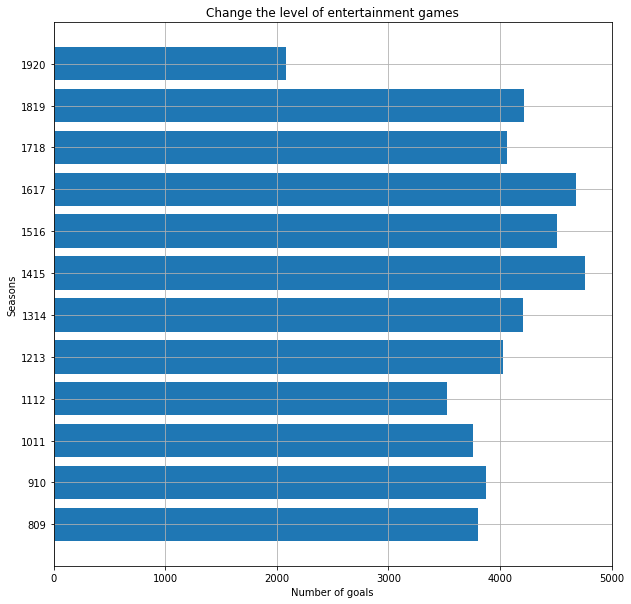

In [11]:
plt.barh(khl_1_sort['SEASON'], khl_1_sort['TOTALFULL'])
plt.xlabel('Number of goals')
plt.ylabel('Seasons')
plt.title('Change the level of entertainment games')
plt.grid()

График отображает общее количество забитых голов в континентальной хоккейной лиге по сезонам.
По графику можно отследить динамику зрелищности сезонов.

## 2 График

In [12]:
khl_players.head()

,Unnamed: 0,player,team,games,goals,assists,points,pl_min,shoots,per_shoots,penalty_time,avr_time_on_ice,position
0,0,Аалтонен Миро,ВИТ,61,19,23,42,9,165,11.5,20,17:39,F
1,1,Аверин Егор,ЛОК,57,13,14,27,15,102,12.7,10,16:18,F
2,2,Авцин Александр,НХК,20,1,2,3,1,24,4.2,8,11:18,F
3,3,Азеведо Джастин,АКБ,62,13,24,37,26,195,6.7,42,16:49,F
4,4,Акмальдинов Александр,СОЧ,30,1,6,7,-3,24,4.2,11,08:30,F


In [13]:
khl_2 = khl_players.groupby('position').sum().filter(items = ['position', 'shoots', 'goals'])

In [14]:
khl_2.head()

,shoots,goals
position,,
D,14899,655
F,30269,3127


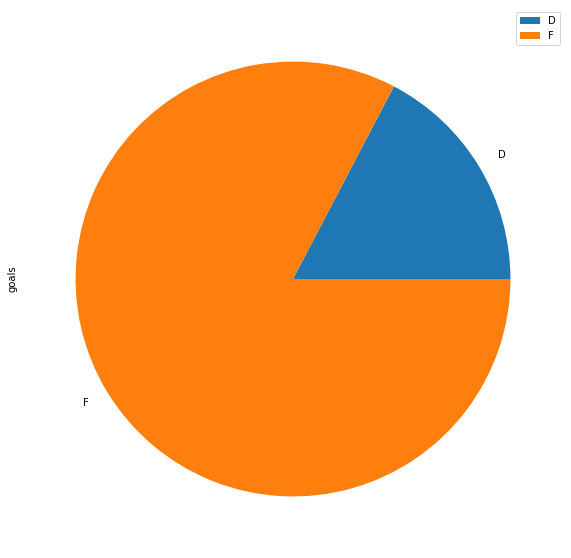

In [15]:
khl_2.plot(kind='pie', y='goals')

График выполнен в вашем любимом виде и отображает разницу между забитыми голами нападающих и защитников =))))))))))

## 3 График

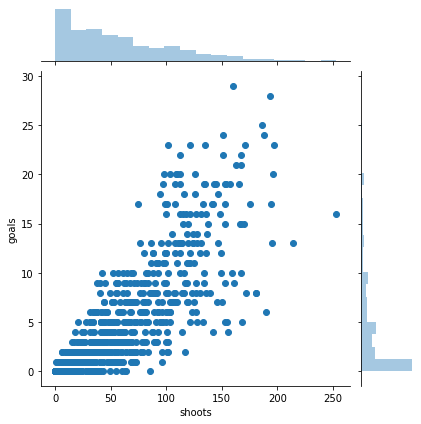

In [16]:
sns.jointplot(x='shoots', y='goals', 
              data=khl_players, kind='scatter')

Думаю по графику можно увидеть связь между количеством бросков и забитыми голами... я не могу прочитать этот график, но надюсь что у меня это получится по ходу обучения... когда я буду знать что такое корреляция дисперсия итд... пока что я могу прочитать только совсем простые графики типа предыдущего =))))))) этот график на вырост)))

## 4 График

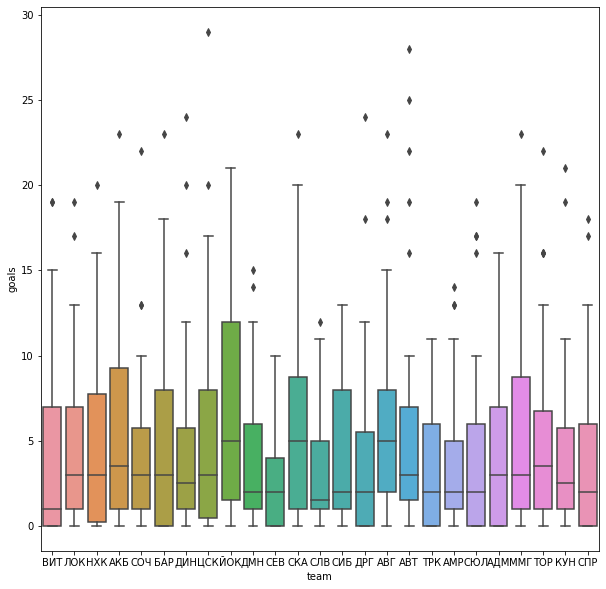

In [17]:
ax = sns.boxplot(x='team', y='goals', data=khl_players)

На этом графике я вижу:
1. йокерит, ска, акбарс команды  в среднем с наиболее результативными игроками
1. самый высокий средний показатель голов на игрока у йокерита ска и авангарда
1. цска и автомобилист имеют в составе самых сильных снайперов лиги
1. есть предположение что команды автомобилист сильно зависит от игры нескольких лучших игроков забивающих гораздо больше других
1. команды сибирь йокерит трактор и лада не имеют ярко выраженых лидеров голеодоров
1. чем длиннее верхний ус или больше верхних выбросов тем больше команда зависит от игры лидеров
1. команда витязь лидер по малозабивающим игрокам

## 5 График

In [18]:
khl.head()

,DATE,DAY,MONTH,YEAR,SEASON,HOMETEAM,AWAYTEAM,WINNER,HG,AG,...,HGOT,AGOT,HGSO,AGSO,TOTALOT,TOTALMAIN,TOTALFULL,TOTALHMAIN,TOTALAWAYMAIN,GAP3PERIODS
0,12/9/2019,9,12,2019,1920,Avangard Omsk,Barys Nur-Sultan,Barys Nur-Sultan,2,3,...,NaN,NaN,NaN,NaN,NaN,5,5,2,3,1
1,12/9/2019,9,12,2019,1920,Dyn. Moscow,SKA St. Petersburg,SKA St. Petersburg,2,3,...,0.0,1.0,NaN,NaN,1.0,4,5,2,2,0
2,12/9/2019,9,12,2019,1920,Jokerit,Sp. Moscow,Jokerit,3,2,...,NaN,NaN,NaN,NaN,NaN,5,5,3,2,1
3,12/9/2019,9,12,2019,1920,Podolsk,Nizhny Novgorod,Podolsk,3,2,...,NaN,NaN,NaN,NaN,NaN,5,5,3,2,1
4,12/9/2019,9,12,2019,1920,Metallurg Magnitogorsk,Dinamo Riga,Metallurg Magnitogorsk,5,1,...,NaN,NaN,NaN,NaN,NaN,6,6,5,1,4


In [19]:
khl_5 = khl.filter(items = ['YEAR', 'TOTAL1', 'TOTAL2', 'TOTAL3' ]).groupby('YEAR').sum()

In [21]:
khl_5.head()

,TOTAL1,TOTAL2,TOTAL3
YEAR,,,
2008,684,821,805
2009,1123,1325,1240
2010,1093,1303,1173
2011,1005,1217,1185
2012,1167,1409,1276


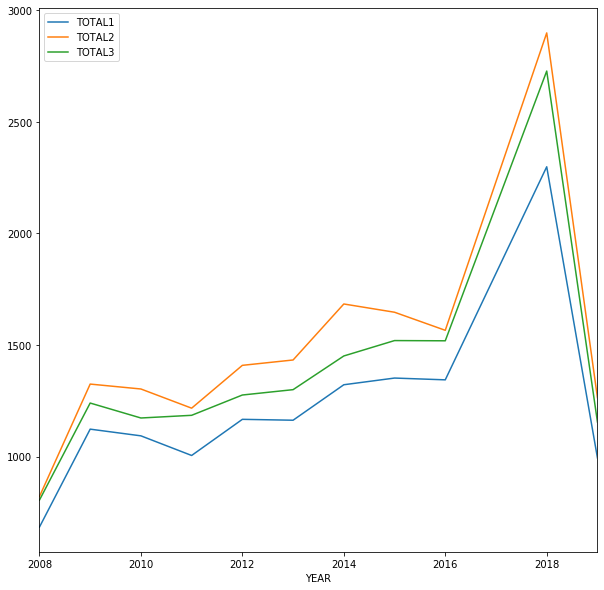

In [22]:
khl_5.plot()

График динамики зрелищности периодов по сезонам. Из графика виден резкий провал в сезон 18-19. Видно что всегда 2 период самый зрелищный а первый самый не зрелищный так что лучше опоздать на игру но не опаздывать на второй период.

Реально полезный вывод)))) обычно я делаю наоборот и пропускаю самое интересное))))